In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

In [2]:
# Load the dataset
file_path = "/Users/stageacomeback/Desktop/Gerard Lee/PolyU SPEED RA/Exploratory Factor Analysis/Sumarised Dataset/Round 4 CSV/R4 EFA 1st Combination.csv"
data = pd.read_csv(file_path)

In [3]:
# Data Cleaning: Remove outliers
data_cleaned = data[(np.abs(zscore(data)) < 3).all(axis=1)]

In [4]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cleaned)

In [5]:
# Check KMO test
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(data_cleaned)
print("KMO Score:", kmo_model)

KMO Score: 0.952926208878002


In [6]:
# Determine optimal number of factors using Scree Plot
fa = FactorAnalyzer(rotation=None)
fa.fit(scaled_data)
eigenvalues, _ = fa.get_eigenvalues()

/Users/stageacomeback/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


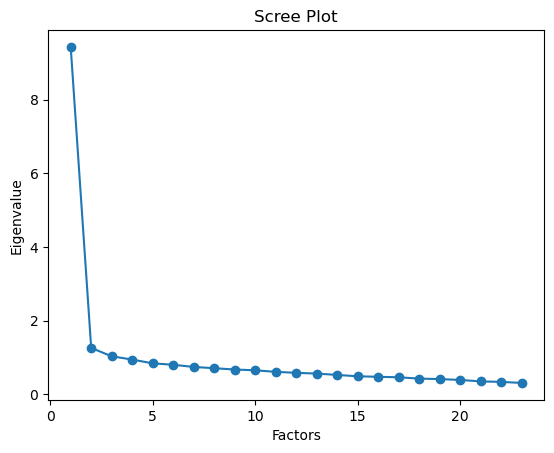

In [7]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, marker="o")
plt.title("Scree Plot")
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
plt.show()

In [25]:
# Perform Factor Analysis with an assigned rotation method
n_factors = 5  # Adjust based on scree plot or eigenvalues
fa = FactorAnalyzer(n_factors=n_factors, rotation="promax", method="principal")
fa.fit(scaled_data)

/Users/stageacomeback/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


FactorAnalyzer(method='principal', n_factors=5, rotation_kwargs={})

In [26]:
# Extract and clean the Pattern Matrix
pattern_matrix = fa.loadings_
pattern_matrix[np.abs(pattern_matrix) < 0.60] = 0  # Suppress small coefficients

In [27]:
# Reassign variables to the dominant component
max_loadings = np.argmax(np.abs(pattern_matrix), axis=1)
reassigned_matrix = np.zeros_like(pattern_matrix)
for i, max_idx in enumerate(max_loadings):
    reassigned_matrix[i, max_idx] = pattern_matrix[i, max_idx]

In [28]:
# Convert to a DataFrame for better readability
columns = [f"Component {i+1}" for i in range(n_factors)]
pattern_df = pd.DataFrame(reassigned_matrix, columns=columns, index=data_cleaned.columns)

In [29]:
# Print the cleaned Pattern Matrix
print("Cleaned Pattern Matrix:")
print(pattern_df)

Cleaned Pattern Matrix:
       Component 1  Component 2  Component 3  Component 4  Component 5
R4MT1     0.000000     0.000000     0.624611      0.00000     0.000000
R4MT2     0.000000     0.000000     0.000000      0.00000     0.000000
R4MT3     0.000000     0.000000     0.000000      0.00000     0.000000
R4MT4     0.000000     0.000000     0.000000      0.00000     0.000000
R4MT5     0.000000     0.000000     0.000000      0.00000     0.000000
R4RA1     0.881131     0.000000     0.000000      0.00000     0.000000
R4RA2     0.000000     0.607040     0.000000      0.00000     0.000000
R4RA3     0.000000     0.802785     0.000000      0.00000     0.000000
R4RA4     0.000000     0.000000     0.000000      0.00000     0.000000
R4RA5     0.000000     0.000000     0.000000      0.00000     0.000000
R4VA1     0.000000     0.000000     0.645420      0.00000     0.000000
R4VA2     0.000000     0.000000     0.870245      0.00000     0.000000
R4VA3     0.677620     0.000000     0.000000      0.0